In [1]:
import os
import sys
from collections import OrderedDict as OD
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib



sIpFile = 'L1T_HCALL2Calib_stage1_l1NtupleChunkyDonut_PFA1p_nVtxAll_checkJEC2022v4_hadded_all.root'
sOutDir = 'plot_calibCheck_2022v4_1'

PT_CAT = OD()
PT_CAT['Ptlt25']   = [ 0,  15,   25]  ## Low pT, turn-on threshold, high pT
PT_CAT['Pt25To35'] = [25,  30,   35]  ## Low pT, turn-on threshold, high pT
PT_CAT['Pt35To60'] = [35,  55,   60]  ## Low pT, turn-on threshold, high pT
PT_CAT['Pt60To90'] = [60,  75,   90]  ## Low pT, turn-on threshold, high pT   #[60,  90,   90]
PT_CAT['Ptgt90']   = [90, 120, 9999]  ## Low pT, turn-on threshold, high pT

ETA_CAT = OD()
ETA_CAT['HBEF'] = [0.000, 5.210]  ## Whole detector, 1 - 41
ETA_CAT['HB']   = [0.000, 1.392]  ## Trigger towers  1 - 16
ETA_CAT['HE1']  = [1.392, 1.740]  ## Trigger towers 17 - 20
ETA_CAT['HE2a'] = [1.740, 2.322]  ## Trigger towers 21 - 25
ETA_CAT['HE2b'] = [2.322, 3.000]  ## Trigger towers 26 - 28
ETA_CAT['HF']   = [3.000, 5.210]  ## Trigger towers 30 - 41

IETA_CAT = OD()
IETA_CAT['HBEF'] = [ 1, 41]  ## Whole detector, 1 - 41
IETA_CAT['HB']   = [ 1, 16]  ## Trigger towers  1 - 16
IETA_CAT['HE1']  = [17, 20]  ## Trigger towers 17 - 20
IETA_CAT['HE2a'] = [21, 25]  ## Trigger towers 21 - 25
IETA_CAT['HE2b'] = [26, 28]  ## Trigger towers 26 - 28
IETA_CAT['HF']   = [30, 41]  ## Trigger towers 30 - 41

dist = ['jet_res_PUS']
sHistograms = [
    'h_$DIST_$IETA_$IPT_0_emu'
]
sRefJetEt = 'GenJetEt'

fIn = uproot.open(sIpFile)

sHistName: h_jet_res_PUS_HBEF_Ptlt25_0_emu,  nCounts: 1194502.0
sHistName: h_jet_res_PUS_HBEF_Pt25To35_0_emu,  nCounts: 1161194.0
sHistName: h_jet_res_PUS_HBEF_Pt35To60_0_emu,  nCounts: 2826583.0
sHistName: h_jet_res_PUS_HBEF_Pt60To90_0_emu,  nCounts: 2515875.0
sHistName: h_jet_res_PUS_HBEF_Ptgt90_0_emu,  nCounts: 12087607.0
sHistName: h_jet_res_PUS_HB_Ptlt25_0_emu,  nCounts: 464996.0
sHistName: h_jet_res_PUS_HB_Pt25To35_0_emu,  nCounts: 470908.0
sHistName: h_jet_res_PUS_HB_Pt35To60_0_emu,  nCounts: 1299267.0
sHistName: h_jet_res_PUS_HB_Pt60To90_0_emu,  nCounts: 1284471.0
sHistName: h_jet_res_PUS_HB_Ptgt90_0_emu,  nCounts: 8238959.0
sHistName: h_jet_res_PUS_HE1_Ptlt25_0_emu,  nCounts: 87056.0
sHistName: h_jet_res_PUS_HE1_Pt25To35_0_emu,  nCounts: 90632.0
sHistName: h_jet_res_PUS_HE1_Pt35To60_0_emu,  nCounts: 265339.0
sHistName: h_jet_res_PUS_HE1_Pt60To90_0_emu,  nCounts: 269607.0
sHistName: h_jet_res_PUS_HE1_Ptgt90_0_emu,  nCounts: 1327964.0
sHistName: h_jet_res_PUS_HE2a_Ptlt25_0_emu, 

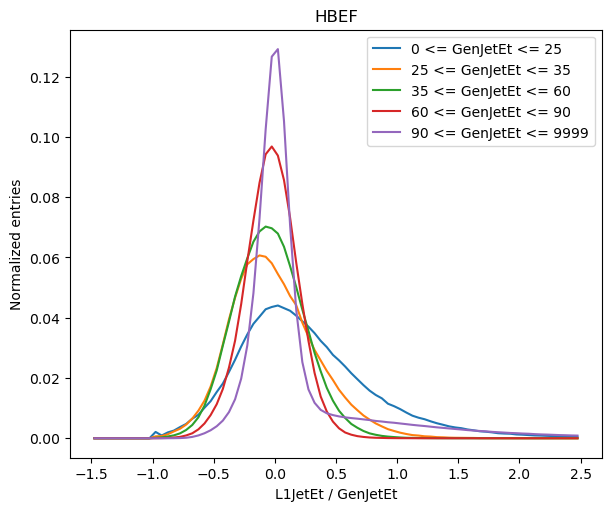

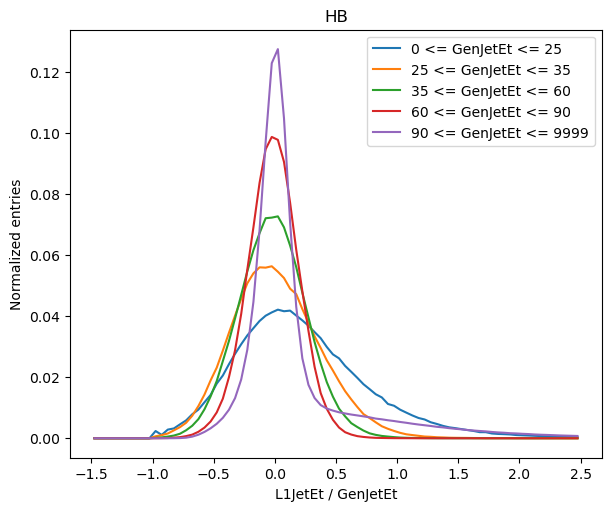

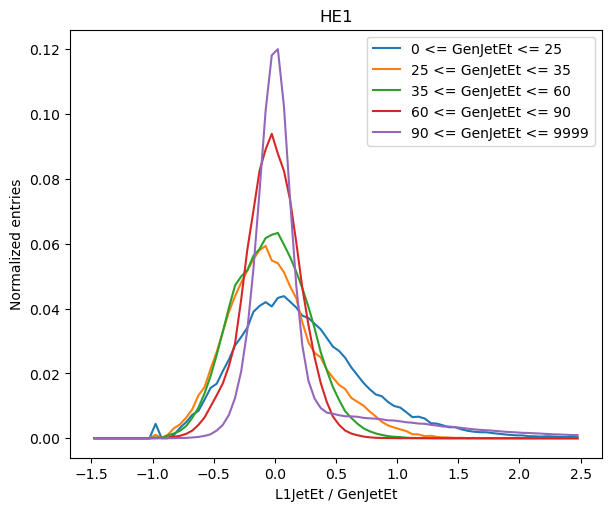

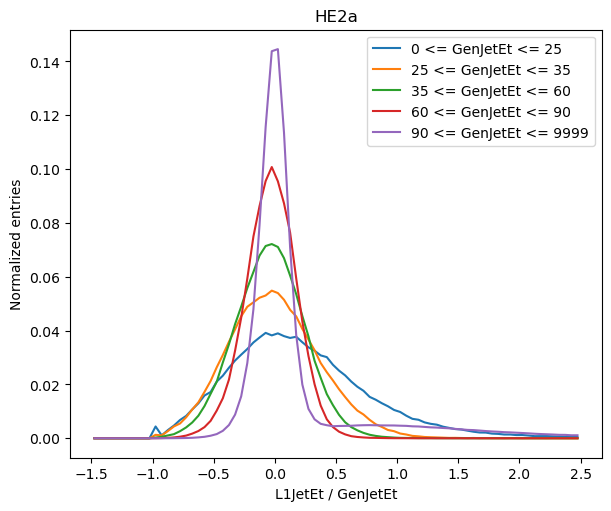

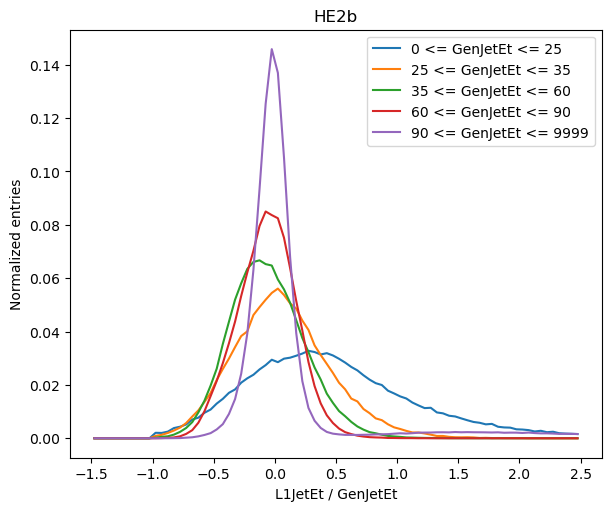

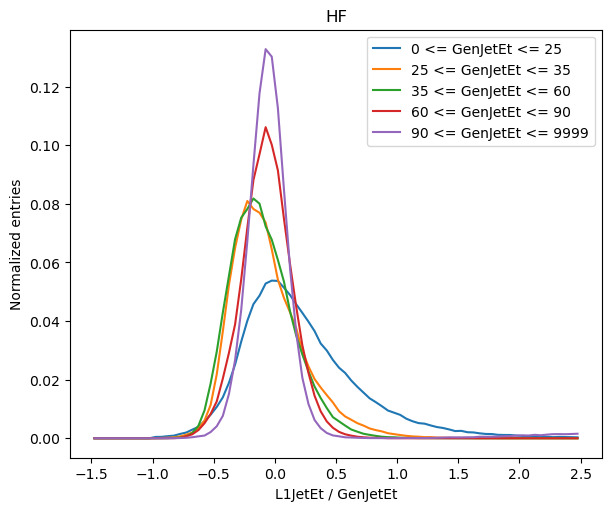

In [3]:
if not os.path.exists(sOutDir): 
    os.makedirs(sOutDir)

for eta_cat in ETA_CAT.keys():
    #if eta_cat != 'HBEF': continue
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
        
    for pt_cat in PT_CAT.keys():
        #if pt_cat != 'Pt25To35': continue
        
        for dist_0 in dist:
            for sHistName in sHistograms:
                sHistName = sHistName.replace('$DIST', dist_0)
                sHistName = sHistName.replace('$IETA', eta_cat)
                sHistName = sHistName.replace('$IPT',  pt_cat)
                
                #print(f"sHistName: {sHistName}")
                #print(f" {fIn[sHistName].to_numpy()}")
                (y, x) = fIn[sHistName].to_numpy()
                #print(f"x ({len(x)}): {x},  y ({len(y)}): {y}")
                x1 = (x[:-1] + x[1:])/2
                #print(f"x1 ({len(x1)}): {x1}")
                y_sum = np.sum(y)
                y1 = y / y_sum
                #print(f"y : {y} \ny1: {y1}")
                print(f"sHistName: {sHistName},  nCounts: {y_sum}")
                
                axs.plot(x1, y1, label='%d <= %s <= %d' % (PT_CAT[pt_cat][0], sRefJetEt, PT_CAT[pt_cat][2]))
    axs.set_xlabel('L1JetEt / %s' % (sRefJetEt))
    axs.set_ylabel('Normalized entries')
    axs.set_title('%s' % (eta_cat))
    axs.legend()
        
    fig.savefig('%s/res_%s.png' % (sOutDir, eta_cat))
 